# 00_Proof Of Concept [EDA & Proof of Concept]
#### Exploratory Data Analysis and proof of concept exploration of turning audio data into an image by stacking audio features in an array to represent the different channels of an image.

In [4]:
pip freeze

absl-py==1.4.0
aiohttp @ file:///C:/b/abs_c4zmy2l696/croot/aiohttp_1670009573673/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow==1.2.3
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
async-timeout @ file:///C:/b/abs_43ozhz2a8g/croots/recipe/async-timeout_1664876362767/work
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
audioread==3.0.0
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4 @ file:///C:/b/abs_0agyz1wsr4/croot/beautifulsoup4-split_1681493048687/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
blinker==1.4
brotlipy==0.7.0
cachetools==5.3.1
certifi==2023.5.7
cffi @ file:///C:/b/abs_49n3v2hyhr/croot/cffi_1670423218144/work
char

In [8]:
#Import Packages
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import librosa
import librosa.feature as lf
import IPython
from IPython import display 

In [2]:
#Load file from current directory
file_path = f"F:\Gunshot_Detection\Gunshot_Data\Gunshot_Range_Tests_Results\Gunshot_Test_data.xlsx"
current_directory = os.getcwd()
print("Current directory:", current_directory)

try: #check if file exists
    df = pd.read_excel(file_path)
    df['Year'] = df['Year'].astype(int)
    df['date'] = df['date'].astype(str).str.zfill(4)
    print('File loaded')
except FileNotFoundError:
    print("File not found. Please provide the correct file path.")

Current directory: F:\Gunshot_Detection\Working
File loaded


In [3]:
#Print dataframe
df

,Year,rec_type,date,rec_name,rec_casing,distance_m,heard,seen,channel_type,sample_rate,orientation,heard_yes_count,heard_no_count,Missing
0,2017,SM4,0208,E10,none,1996.6,No,No,stereo,16,towards.gun,20.0,1.0,1.0
1,2017,SM4,0208,E10,none,1892.3,Yes,No,stereo,16,towards.gun,NaN,NaN,NaN
2,2017,SM4,0208,E10,none,1808.0,Yes,No,stereo,16,towards.gun,NaN,NaN,NaN
3,2017,SM4,0208,E10,none,1700.5,Yes,No,stereo,16,towards.gun,NaN,NaN,NaN
4,2017,SM4,0208,E10,none,1601.8,Yes,No,stereo,16,towards.gun,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2019,SM4,1108,G17,none,1676.9,Yes,No,stereo,48,mic.each.way,NaN,NaN,NaN
545,2019,SM4,1108,G17,none,1787.0,No,No,stereo,48,mic.each.way,NaN,NaN,NaN
546,2019,SM4,1108,G17,none,1880.8,No,No,stereo,48,mic.each.way,NaN,NaN,NaN
547,2019,SM4,1108,G17,none,1983.0,No,No,stereo,48,mic.each.way,NaN,NaN,NaN


In [4]:
# Group the DataFrame by the desired columns and assign a unique index to each combination
df['Index'] = df.groupby(['Year', 'date', 'rec_name', 'rec_type']).cumcount()

# Create a DataFrame to store the unique combinations and their indexes
unique_combinations = df[['Year', 'date', 'rec_name', 'rec_type']].drop_duplicates()
unique_combinations['Indexes'] = ''

# Iterate over the unique combinations and populate the 'Indexes' column
for index, row in unique_combinations.iterrows():
    indexes = df.loc[(df['Year'] == row['Year']) & (df['date'] == row['date']) &
                     (df['rec_name'] == row['rec_name']) & (df['rec_type'] == row['rec_type']), 'Index']
    unique_combinations.at[index, 'Indexes'] = indexes.values.tolist()

# Print the DataFrame with unique combinations and their indexes
print(unique_combinations)

# List to store indexes where folder structure is incorrect
incorrect_indexes = []

# Check folder structure for each unique combination
for indexes in unique_combinations['Indexes']:
    for loc_num in indexes:
        year, rec_type, date, rec_name = df.loc[loc_num, ['Year', 'rec_type', 'date', 'rec_name']]
        directory = fr"Gunshot_Range_Tests_Results\Audio\{year}\{rec_type}\{date}\{rec_name}"

        print(directory)
        print(year, rec_type, date, rec_name)

        if not os.path.exists(directory):
            print('Directory not found')
            incorrect_indexes.append(loc_num)
        else:
            file_names = os.listdir(directory)
            data = {
                'file_name': file_names,
                'type': [rec_type] * len(file_names),
                'name': [rec_name] * len(file_names),
                'date': [date] * len(file_names),
                'year': [year] * len(file_names)
            }

            data = pd.DataFrame(data)
            print('File(s) exist')
            print(data)

        print()

# Print the list of indexes with incorrect folder structure
print("Indexes with incorrect folder structure:")
print(incorrect_indexes)


     Year  date rec_name   rec_type  \
0    2017  0208      E10        SM4   
21   2017  0308       E1        SM4   
40   2017  0308       E7        SM4   
59   2017  1208      SM4        SM4   
79   2017  1208     Solo       Solo   
99   2018  0206  Arbimon    Arbimon   
123  2018  0206    SM4.1        SM4   
147  2018  0206    SM4.2        SM4   
171  2018  0206  Solo.19       Solo   
195  2019  1008       J1  Audiomoth   
219  2019  1008       J2  Audiomoth   
243  2019  1008       J3  Audiomoth   
267  2019  1008       J4  Audiomoth   
291  2019  1008       J5  Audiomoth   
315  2019  1008       J6  Audiomoth   
339  2019  1108       J1  Audiomoth   
360  2019  1108       J2  Audiomoth   
381  2019  1108       J3  Audiomoth   
402  2019  1108       J4  Audiomoth   
423  2019  1108       J5  Audiomoth   
444  2019  1108       J6  Audiomoth   
465  2019  1108      G10        SM4   
486  2019  1108      G14        SM4   
507  2019  1108      G16        SM4   
528  2019  1108      G17 

Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10
Directory not found

Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
2017 SM4 0208 E10

In [5]:
#Loading the first file
loc_num = 0
year, rec_type, date, rec_name = df.loc[loc_num, ['Year', 'rec_type', 'date', 'rec_name']]
directory = fr"F:\Gunshot_Detection\Gunshot_Data\Gunshot_Range_Tests_Results\Audio\{year}\{rec_type}\{date}\{rec_name}"
print(directory) #Set directory

# Get a list of all files in the directory
file_list = os.listdir(directory)

if len(file_list) > 0:
    # Select the first file from the list
    first_file = file_list[0]
    first_file = f'{first_file}'
    print("first_file:", first_file)
else:
    print("No files found in the directory.")

F:\Gunshot_Detection\Gunshot_Data\Gunshot_Range_Tests_Results\Audio\2017\SM4\0208\E10
first_file: SM4_E10_1000M_020817.wav


In [6]:
# Load the WAV file
audio_sample = f'{directory}\{first_file}'

In [9]:
#Load WAV file to audio player
x, Fs = librosa.load(audio_sample) #sr = Fs, y = x

display.Audio(audio_sample)

Duration is 10.0s


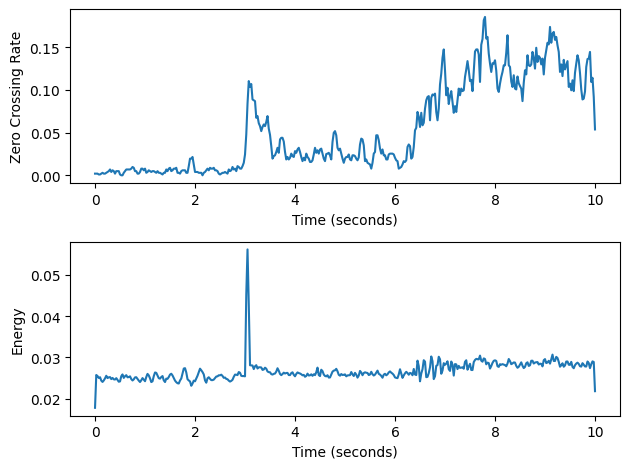

In [11]:
# Calculate duration
duration = len(x) / float(Fs)
print(f'Duration is {duration}s')

# Convert stereo to mono
x_mono = librosa.to_mono(x)

# Extract features using librosa
n_fft = int(0.050 * Fs)  # 50 ms window size
hop_length = int(0.025 * Fs)  # 25 ms hop size

# Feature extraction
zero_crossing_rate = lf.zero_crossing_rate(y=x_mono, hop_length=hop_length)[0]
energy = lf.rms(y=x_mono, frame_length=n_fft, hop_length=hop_length)[0]

# Create timestamps
timestamps = np.linspace(0, duration, num=zero_crossing_rate.shape[0])

# Plotting using ZCR and Energy
plt.subplot(2, 1, 1)
plt.plot(timestamps, zero_crossing_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Zero Crossing Rate')

plt.subplot(2, 1, 2)
plt.plot(timestamps, energy)
plt.xlabel('Time (seconds)')
plt.ylabel('Energy')

plt.tight_layout()
plt.show()

In [12]:
#Creating the spectrograms
mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=Fs, n_mels=128)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

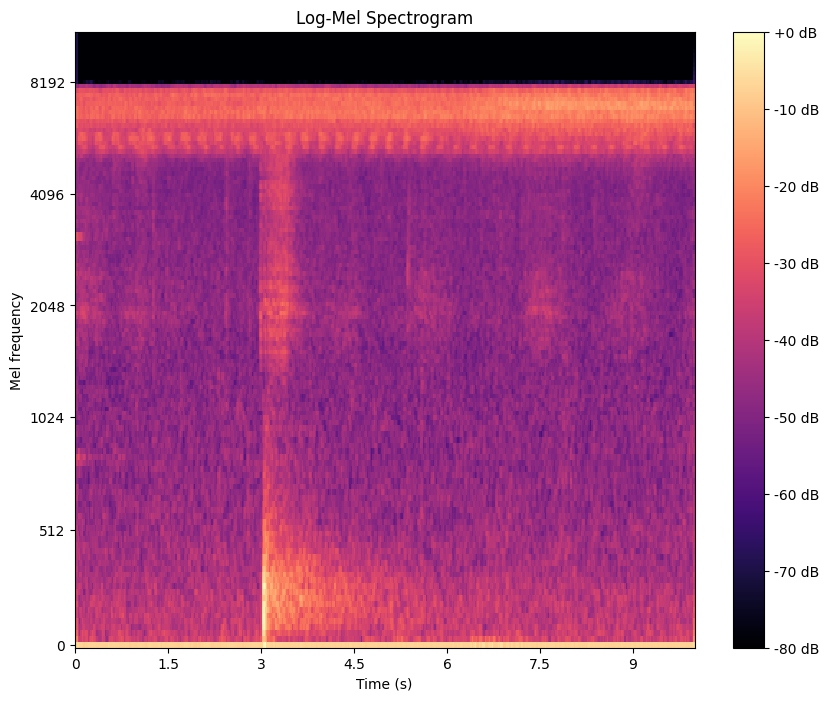

In [13]:
#Spectrogram: Log-Mel Spectrogram
plt.figure(figsize=(10, 8))
librosa.display.specshow(log_mel_spectrogram, sr=Fs, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Mel frequency')
plt.title('Log-Mel Spectrogram')
plt.show()
#plt.savefig('name.png') saves the picture

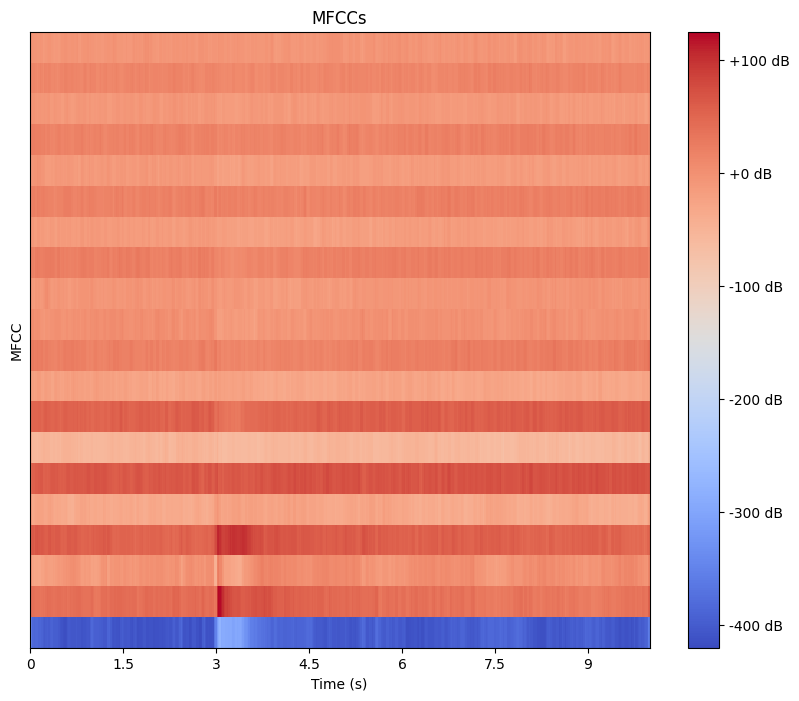

In [15]:
#Spectrogram: MFCCs
mfccs = librosa.feature.mfcc(y=x, sr=Fs)
plt.figure(figsize=(10, 8))
librosa.display.specshow(mfccs, sr=Fs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('MFCC')
plt.title('MFCCs')
plt.show()

In [17]:
#Calculating the Self Similarity Matrix
hop_length = 1024
chroma = librosa.feature.chroma_cqt(y=x, sr=Fs, hop_length=hop_length)
# Use time-delay embedding to get a cleaner recurrence matrix
chroma_stack = librosa.feature.stack_memory(chroma, n_steps=10, delay=3)
R = librosa.segment.recurrence_matrix(chroma_stack)
R_aff = librosa.segment.recurrence_matrix(chroma_stack, metric='cosine', mode='affinity')

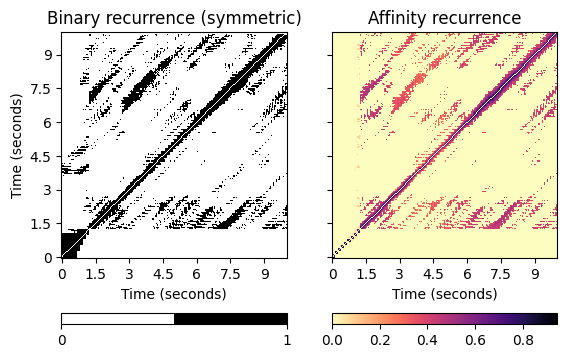

In [18]:
#Visualisation: Affinity Recurrence - SSM
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
imgsim = librosa.display.specshow(R, x_axis='s', y_axis='s',
                         hop_length=hop_length, ax=ax[0])
ax[0].set(title='Binary recurrence (symmetric)')
imgaff = librosa.display.specshow(R_aff, x_axis='s', y_axis='s',
                         hop_length=hop_length, cmap='magma_r', ax=ax[1])
ax[1].set(title='Affinity recurrence')
ax[1].label_outer()
fig.colorbar(imgsim, ax=ax[0], orientation='horizontal', ticks=[0, 1])
fig.colorbar(imgaff, ax=ax[1], orientation='horizontal')

In [20]:
#Check Shape
log_mel_spectrogram_norm = (log_mel_spectrogram - np.min(log_mel_spectrogram)) / (np.max(log_mel_spectrogram) - np.min(log_mel_spectrogram))
mfccs_norm = (mfccs - np.min(mfccs)) / (np.max(mfccs) - np.min(mfccs))
R_aff_norm = (R_aff - np.min(R_aff)) / (np.max(R_aff) - np.min(R_aff))

print(log_mel_spectrogram_norm.shape)
print(mfccs_norm.shape)
print(R_aff_norm.shape)

(128, 431)
(20, 431)
(216, 216)


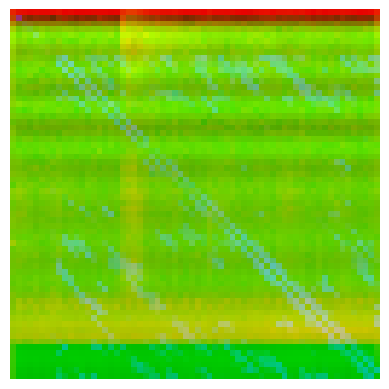

In [22]:
#Stacking audio features into an image and returning an example
from scipy.ndimage import zoom

# Resize the arrays to match a desired shape
desired_shape = (64, 64)  # Adjust the desired shape as needed

log_mel_spectrogram_resized = zoom(log_mel_spectrogram_norm, (desired_shape[0] / log_mel_spectrogram_norm.shape[0], desired_shape[1] / log_mel_spectrogram_norm.shape[1]))
mfccs_resized = zoom(mfccs_norm, (desired_shape[0] / mfccs_norm.shape[0], desired_shape[1] / mfccs_norm.shape[1]))
R_aff_resized = zoom(R_aff_norm, (desired_shape[0] / R_aff_norm.shape[0], desired_shape[1] / R_aff_norm.shape[1]))

# Stack the resized arrays
image = np.stack([log_mel_spectrogram_resized, mfccs_resized, R_aff_resized], axis=-1)
image = np.clip(image, 0, 1)

plt.imshow(image)
plt.axis('off')
plt.show()